# The very basic of cartopy

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

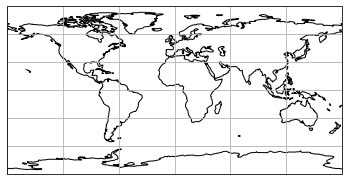

<IPython.core.display.Javascript object>

In [2]:
# Draw a plain map

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # Plate Carree = 正距円筒図法

ax.coastlines()
ax.gridlines()

plt.show()

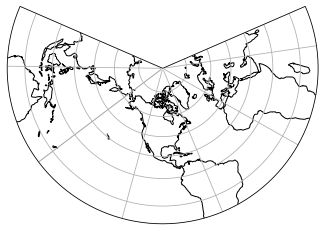

<IPython.core.display.Javascript object>

In [3]:
# Other map projections

projection = ccrs.LambertConformal()  # ランベルト正角円錐図法
# projection = ccrs.AzimuthalEquidistant()
# projection = ccrs.Mercator()
# projection = ccrs.Mollweide()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=projection)

ax.coastlines()
ax.gridlines()

plt.show()

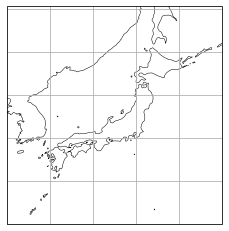

<IPython.core.display.Javascript object>

In [4]:
# Specific area

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([125, 150, 25, 50])
ax.coastlines(resolution="50m", lw=0.5)
ax.gridlines()
# ax.stock_img()

plt.show()

## Plot the temperature data
- Data source: Japan Meteorological Agency(JMA: 気象庁)
- [Automated Meteorological Data Acquisition System(AMeDAS: アメダス)](https://www.jma.go.jp/jma/kishou/know/amedas/kaisetsu.html)
- [Today's highest temperature](https://www.data.jma.go.jp/obd/stats/data/mdrr/index.html)

In [5]:
# AMeDAS site data

import pandas as pd

spot_url = "https://www.jma.go.jp/jma/kishou/know/amedas/ame_master.zip"
spot_df = pd.read_csv(spot_url, compression="zip", encoding="cp932")

spot_df.head()

,都府県振興局,観測所番号,種類,観測所名,ｶﾀｶﾅ名,所在地,緯度(度),緯度(分),経度(度),経度(分),海面上の高さ(ｍ),風速計の高さ(ｍ),温度計の高さ(ｍ),観測開始年月日,備考1,備考2
0,宗谷,11001,四,宗谷岬,ｿｳﾔﾐｻｷ,稚内市宗谷岬,45,31.2,141,56.1,26,10,1.5,昭53.10.30,－,－
1,宗谷,11016,官,稚内,ﾜｯｶﾅｲ,稚内市開運 稚内地方気象台,45,24.9,141,40.7,3,23.5,－,#昭50.4.1,11903,－
2,宗谷,11046,四,礼文,ﾚﾌﾞﾝ,礼文郡礼文町大字香深村トンナイ,45,18.3,141,2.7,65,6.5,1.5,平15.10.17,－,湿度を除く
3,宗谷,11061,官,声問,ｺｴﾄｲ,稚内市大字声問村字声問 稚内航空気象観測所,45,24.2,141,48.1,8,10,－,平15.1.1,11904,日照・湿度・気圧を除く
4,宗谷,11076,四,浜鬼志別,ﾊﾏｵﾆｼﾍﾞﾂ,宗谷郡猿払村浜鬼志別,45,20.1,142,10.2,13,6.5,1.5,昭53.10.30,11900,湿度を除く


<IPython.core.display.Javascript object>

In [6]:
# Today's highest templature

mxtemp_url = "https://www.data.jma.go.jp/obd/stats/data/mdrr/tem_rct/alltable/mxtemsadext00_rct.csv"
mxtemp_df = pd.read_csv(mxtemp_url, encoding="cp932")

mxtemp_df.head()

,観測所番号,都道府県,地点,国際地点番号,現在時刻(年),現在時刻(月),現在時刻(日),現在時刻(時),現在時刻(分),今日の最高気温(℃),...,昨日までの観測史上1位の値の品質情報,昨日までの観測史上1位の値を観測した起日（年）,昨日までの観測史上1位の値を観測した起日（月）,昨日までの観測史上1位の値を観測した起日（日）,昨日までの3月の1位の値,昨日までの3月の1位の値の品質情報,昨日までの3月の1位の値の起日（年）,昨日までの3月の1位の値の起日（月）,昨日までの3月の1位の値の起日（日）,統計開始年
0,11001,北海道宗谷地方,宗谷岬（ソウヤミサキ）,NaN,2021,3,18,14,0,0.4,...,8,2000,8,1,13.4,8,2018,3,28,1978
1,11016,北海道宗谷地方,稚内（ワッカナイ）,47401.0,2021,3,18,14,0,1.3,...,8,1946,8,22,13.1,8,2018,3,28,1938
2,11046,北海道宗谷地方,礼文（レブン）,NaN,2021,3,18,14,0,2.7,...,8,2020,9,3,11.0,8,2020,3,20,2003
3,11061,北海道宗谷地方,声問（コエトイ）,NaN,2021,3,18,14,0,1.1,...,8,2019,9,8,12.7,8,2020,3,27,2003
4,11076,北海道宗谷地方,浜鬼志別（ハマオニシベツ）,NaN,2021,3,18,14,0,0.8,...,8,2000,7,31,14.5,8,2018,3,28,1978


<IPython.core.display.Javascript object>

In [7]:
# Format data

spot_df["lat"] = spot_df["緯度(度)"] + (spot_df["緯度(分)"] / 60)
spot_df["lon"] = (spot_df["経度(度)"]) + (spot_df["経度(分)"] / 60)
max_temp_df = (
    pd.merge(left=spot_df, right=mxtemp_df, on="観測所番号")
    .loc[:, ["lon", "lat", "今日の最高気温(℃)"]]
    .rename(columns={"今日の最高気温(℃)": "temp"})
)
max_temp_df

,lon,lat,temp
0,141.935000,45.520000,0.4
1,141.678333,45.415000,1.3
2,141.045000,45.305000,2.7
3,141.801667,45.403333,1.1
4,142.170000,45.335000,0.8
...,...,...,...
941,123.765000,24.426667,26.7
942,124.163333,24.336667,26.8
943,124.245000,24.395000,26.0
944,123.871667,24.265000,25.8


<IPython.core.display.Javascript object>

In [8]:
# Get max and min of temp

tmax = max_temp_df.temp.max()
tmin = max_temp_df.temp.min()
tmax, tmin

(27.4, -2.6)

<IPython.core.display.Javascript object>

In [9]:
mxtemp_df.loc[mxtemp_df["今日の最高気温(℃)"] > 26].loc[:, ["都道府県", "地点", "今日の最高気温(℃)"]]

,都道府県,地点,今日の最高気温(℃)
897,沖縄県,名護（ナゴ）,26.1
902,沖縄県,那覇（ナハ）,26.3
903,沖縄県,安次嶺（アシミネ）,26.1
908,沖縄県,下地島（シモジシマ）,26.7
911,沖縄県,仲筋（ナカスジ）,27.2
913,沖縄県,所野（トコロノ）,27.1
914,沖縄県,与那国島（ヨナグニジマ）,27.0
915,沖縄県,西表島（イリオモテジマ）,26.7
916,沖縄県,石垣島（イシガキジマ）,26.8
919,沖縄県,波照間（ハテルマ）,27.4


<IPython.core.display.Javascript object>

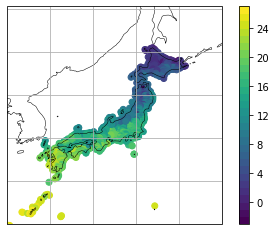

<IPython.core.display.Javascript object>

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Prepare color map
from matplotlib.colors import BoundaryNorm

levels = list(range(int(tmin - 1), int(tmax + 1), 1))
cmap = plt.get_cmap("viridis")
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


ax.set_extent([125, 150, 25, 50])
# ax.set_extent([136,141,34,39])

ax.coastlines(resolution="50m", lw=0.5)
ax.gridlines()

sc = ax.scatter(
    max_temp_df.loc[:, "lon"],
    max_temp_df.loc[:, "lat"],
    c=max_temp_df.loc[:, "temp"],
    cmap=cmap,
    norm=norm,
)

plt.colorbar(sc)


plt.show()